##### Algorithms and Data Structures (Winter - Spring 2022)

* [Table of Contents](ADS_TOC.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/ADS_highschool_math"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/ADS_highschool_math.ipynb)

# High School Mathematics

High school mathematics is a moving target and to track it is to change it, if only by adding to one's awareness of where we've been.  Nor does every subculture follow the same evolutionary path.  The Republic of South Africa, which I've had the privilege of visiting, faces a different set of challenges than California or Oregon.  Different, yet partially overlapping.

One entry point into the many debates is the role of technology and how should it be used.  

In this Jupyter Notebook, we look at the actual and/or potential role of Jupyter Notebooks along with their wider ecosystem.  Historically speaking, they developed from the Python world as I-Python Notebooks.  

Nowadays, Jupyter Notebooks may be used to introduce several computer languages.  But what do computer languages have to do with mathematics?  Nothing?  

## The Function and The Set

In the several states of North America, the pre-college curriculum saw a sudden infusion of new rigor in the early 1960s, from specific corners (SMSG, University of Chicago), aimed at bolstering the sophistication of American children.  Elementary schoolers tackled the union and intersection of sets, and in algebra took up "functions" in a more serious and formal way. 

The arithmetic of grocery shopping, savings, managing a farm, was being displaced by what they called the New Math.  Some joked about it, others found it too menacing to be a laughing matter.

Sets would be our primary data structures going forward and these included the progressively more encompassing, all of them infinite, sets of number types:  

* Counting Numbers, or set $\mathbb{N}$ 
* Whole Numbers $\mathbb{W}$
* Integers $\mathbb{Z}$
* Rationals $\mathbb{Q}$
* Reals $\mathbb{R}$ 
* Complex numbers $\mathbb{C}$ 

each a superset of the next previous.

$$
\mathbb{N} \subset  
\mathbb{W} \subset 
\mathbb{Z} \subset 
\mathbb{Q} \subset 
\mathbb{R} \subset 
\mathbb{C}
$$

The Naturals break up into Primes and Composites.  The Reals break up into Rationals and Irrationals, amidst a lot of philosophy.  Irrationals include the Transcendentals.

Functions, a subtype of Relations, define puzzles regarding finding their "roots" or "zeros" along with local "minima" and "maxima".   More generally, they're but mappings, of a domain set to a range set, with ballistics metaphors implied. 

The "solution space" would be with respect to one of these number sets, if indeed numbers were at the heart of the solving algorithm.  Complex numbers give us the ability to find the n roots of an equation to the nth degree.  They would give us the complex plane and the ability to visualize fractals.  They would integrate deeply with trig, by way of exponentials and logarithms.

## Plotting

The function we usually come to, as a pre-requisite for calculus, is the polynomial.  Before we integrate or differentiate such a curve, we learn to (a) plot it on graph paper (i.e. the screen) and (b) to find its roots, or zeros.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rat_domain = np.linspace(-5, 5, 200)

In [3]:
def power_curve(domain, the_power):
    return domain ** the_power

In [4]:
out_range_1 = power_curve(rat_domain, 1)

In [5]:
out_range_2 = power_curve(rat_domain, 2)

In [6]:
out_range_3 = power_curve(rat_domain, 3)

In [7]:
import pandas as pd

In [8]:
table = pd.DataFrame({1:out_range_1, 
                      2:out_range_2, 
                      3:out_range_3},
                      index = rat_domain)
table.head()

,1,2,3
-5.000000,-5.000000,25.000000,-125.000000
-4.949749,-4.949749,24.500013,-121.268907
-4.899497,-4.899497,24.005076,-117.612808
-4.849246,-4.849246,23.515189,-114.030942
-4.798995,-4.798995,23.030353,-110.522547


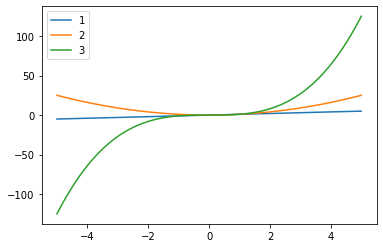

In [9]:
table.plot();

In [10]:
import sympy as sp

In [11]:
x = sp.Symbol('x')
poly = (x - 3)*(x + 2)*(x - 5)*(x + 7)
poly

(x - 5)*(x - 3)*(x + 2)*(x + 7)

In [12]:
poly.expand()

x**4 + x**3 - 43*x**2 + 23*x + 210

Here's a bridge to that Lambda Calculus, in that lambda has a meaning of "any function" and in the context below, makes an expression ready to iterate through some numpy array.  It "vectorizes" in other words, a term used by numpy itself.  Without resorting to for loop constructs, or mentioning indices, the `poly` expression races through our 400 point domain, applying itself to each x.

The original domain, and the corresponding range (linked by poly), stand side by side as columns, in a pandas DataFrame.  From the DataFrame object, we may plot directly.

In [13]:
f = sp.lambdify(x, poly, 'numpy')

In [14]:
domain = np.linspace(-7.5,7.5,400)
data_f = pd.DataFrame({"f(x)": f(domain)}, 
                      index = domain)
data_f.index.name = 'x'
data_f.head()

,f(x)
x,
-7.500000,360.937500
-7.462406,329.337298
-7.424812,298.496719
-7.387218,268.406589
-7.349624,239.057783


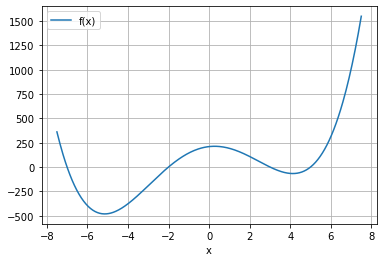

In [15]:
data_f.plot(grid=True);

## Circular Functions

From polynomials we move to the trigonometric functions and properties such as amplitude and frequency.

The grand unification of circular functions and exponential functions on the Complex plane marks another branch point, where we optionally dive into fractals.

In [16]:
domain = np.linspace(-10, 10, 400)
data_sin = pd.DataFrame({"sin(x)": np.sin(domain)}, 
                      index = domain)
data_sin.index.name = 'radians'
data_sin.head()

,sin(x)
radians,
-10.000000,0.544021
-9.949875,0.501297
-9.899749,0.457313
-9.849624,0.412181
-9.799499,0.366013


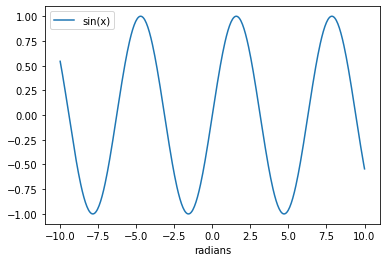

In [17]:
data_sin.plot();

In [18]:
theta = sp.Symbol('theta')
expr = sp.exp(sp.I * theta)
expr

exp(I*theta)

In [19]:
g = sp.lambdify(theta, expr, 'numpy')

In [20]:
domain = np.linspace(0, 10, 200)
data_g = pd.DataFrame({"g(x)": g(domain)}, 
                      index = domain)
data_g.index.name = 'radians'
data_g.head()

,g(x)
radians,
0.000000,1.000000+0.000000j
0.050251,0.998738+0.050230j
0.100503,0.994954+0.100333j
0.150754,0.988658+0.150183j
0.201005,0.979866+0.199654j


In [21]:
data_g.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 200 entries, 0.0 to 10.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype     
---  ------  --------------  -----     
 0   g(x)    200 non-null    complex128
dtypes: complex128(1)
memory usage: 4.7 KB


In [22]:
data_g["x"] = data_g["g(x)"].apply(lambda x: x.real)
data_g["y"] = data_g["g(x)"].apply(lambda x: x.imag)

In [23]:
data_g.head()

,g(x),x,y
radians,,,
0.000000,1.000000+0.000000j,1.000000,0.000000
0.050251,0.998738+0.050230j,0.998738,0.050230
0.100503,0.994954+0.100333j,0.994954,0.100333
0.150754,0.988658+0.150183j,0.988658,0.150183
0.201005,0.979866+0.199654j,0.979866,0.199654


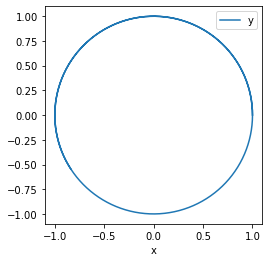

In [24]:
data_g.plot(x="x",y="y")
ax = plt.gca()
ax.set_aspect("equal")

## Delta Calculus

The reason for calling it Delta Calculus is to get around using a proper name, such as "Newtonian", much as we're free to recapitulate his work in "fluxions".  The reader is reminded of many calculi, as maths are full of them, and room for Lambda Calculus appears, with a kind of symmetry between them.  That's to expand the meaning of both, perhaps, to embrace their destinies.

The focus I've been adopting, as a curriculum dev, is to focus on the data science curve known as the Gaussian or normal curve.  This "bell curve" is very well thought out and much studied, and its integral, the CDF, is likewise prevalent as a pattern, such as when we watch a fad sweep through a population:  early adopters, over the hump, late adopters.  How it all adds up looks like a lazy S, almost like the integral symbol itself.

Machine Learning is likewise a gateway into differential calculus as the idea of gradient descent starts quickly, with terrain metaphors.  We've all descended gradients.  We will get to slopes and tangent planes later.  Starting with complex applications then refining the concepts through simplification, of what's actually under study, is something science is good at.  Replace an organism with a single cell.  Reduce everything to group theory.

In [25]:
domain = np.linspace(-6, 6, 500)

In [26]:
x, σ, μ = sp.symbols(['x','σ', 'μ'])

In [27]:
f = sp.Symbol('f')

In [28]:
expr1 = (1/(σ * sp.sqrt(2 * sp.pi)))
expr2 = sp.exp(sp.Rational(-1,2) * ((x - μ)/σ)**2)
gaussian = expr2 * expr1
gaussian

sqrt(2)*exp(-(x - μ)**2/(2*σ**2))/(2*sqrt(pi)*σ)

In [29]:
gaussian = gaussian.subs(μ, 0)
gaussian = gaussian.subs(σ, 1)
gaussian

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

In [30]:
domain = np.linspace(-6, 6, 500)
f = sp.lambdify(x, gaussian, 'numpy')
y_vals = f(domain)

In [31]:
bell_curve_df = pd.DataFrame({'x':domain, 'y':y_vals})
bell_curve_df.head()

,x,y
0,-6.000000,6.075883e-09
1,-5.975952,7.016936e-09
2,-5.951904,8.099059e-09
3,-5.927856,9.342657e-09
4,-5.903808,1.077098e-08


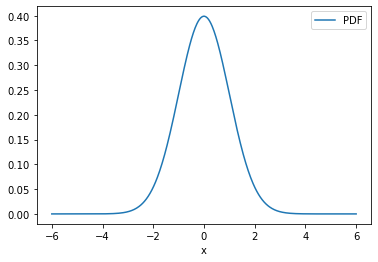

In [32]:
bell_curve_df.plot(x='x', y='y')
plt.legend(['PDF']);

In [33]:
sp.integrate(gaussian, (x, -6, 6)).evalf(6)

1.00000

In [34]:
bell_curve_df

,x,y
0,-6.000000,6.075883e-09
1,-5.975952,7.016936e-09
2,-5.951904,8.099059e-09
3,-5.927856,9.342657e-09
4,-5.903808,1.077098e-08
...,...,...
495,5.903808,1.077098e-08
496,5.927856,9.342657e-09
497,5.951904,8.099059e-09
498,5.975952,7.016936e-09


In [35]:
h = abs(domain[0] - domain[1])
h

0.02404809619238435

In [36]:
bell_curve_df['CDF'] = np.cumsum(bell_curve_df['y']*h) # discrete integral

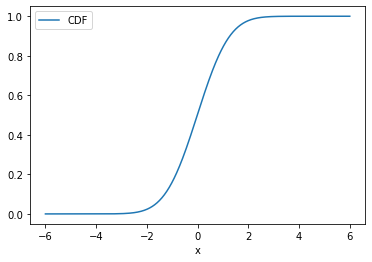

In [37]:
bell_curve_df.plot(x='x', y='CDF');

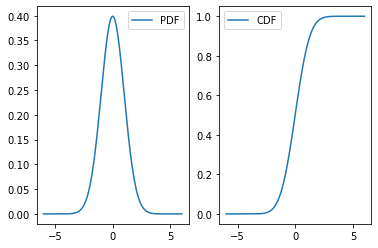

In [38]:
plt.subplots()
plt.subplot(121)
plt.plot(bell_curve_df['x'], bell_curve_df['y'])
plt.legend(['PDF'])
plt.subplot(122)
plt.plot(bell_curve_df['x'], bell_curve_df['CDF'])
plt.legend(['CDF']);